## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [2]:
import sys
import os
from scipy.stats import mannwhitneyu, wilcoxon, ranksums
#from statannotations.Annotator import Annotator
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../..']

In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu
from src.utils import visualization_utils
#from statannotations.Annotator import Annotator

In [4]:
sns.__version__

'0.13.0'

In [5]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"
human_col = "Human"
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['figure.autolayout'] = True

DEFAULT_FIGURE_CONFIG = {
    "figsize": (10, 10),
    "xtick.labelsize": 18,
    "ytick.labelsize": 18    
}




In [6]:
# df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240517/host_multi_all_models/host_multi_all_models_evaluation_metrics.csv"))
# df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240611/host_multi_all_models/host_multi_all_models-msl2048_evaluation_metrics.csv"))
#df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20241106/host_multi/host_multi_all_models_evaluation_metrics.csv"))
# df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20241127/host_multi/host_multi_all_models_evaluation_metrics.csv"))
# df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20241202/host_multi/host_multi_all_models_evaluation_metrics.csv"))
#df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20241216/host_multi/host_multi_all_models_evaluation_metrics.csv"))
#df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20250106/host_multi/host_multi_all_models_evaluation_metrics.csv"))
df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20250206/host_multi/host_multi_all_models_evaluation_metrics.csv"))
df.drop(columns="Unnamed: 0", inplace=True)
df

,itr,experiment,auprc
0,0,LR,0.433765
1,1,LR,0.428972
2,2,LR,0.440230
3,3,LR,0.464170
4,4,LR,0.437962
...,...,...,...
74,0,VirProBERT,0.639349
75,1,VirProBERT,0.672554
76,2,VirProBERT,0.703604
77,3,VirProBERT,0.688975


In [7]:
df = df.replace({"experiment": {"LR-maxitr5000": "LR", "Protein-BERT": "ProteinBERT", "VirPro-BERT": "VirProBERT", "Protein-BERT_new_ds": "ProteinBERT", "ProstT5-lr3e-4-new": "ProstT5"}})

In [8]:
df["experiment"].unique()

array(['LR', 'RF', 'SVM', 'FNN', 'CNN', 'RNN', 'LSTM',
       'Transformer-Encoder', 'ProtT5-xl-uniref50', 'ProstT5-lr3e-4-old',
       'ProstT5', 'ESM2-t12_35M_UR50D', 'ESM2-t33_650M_UR50D',
       'ESM2-t36_3B_UR50D', 'ESM3', 'VirProBERT'], dtype=object)

In [9]:
sub_df = df[df["experiment"].isin(["LR", "RF", "SVM", "CNN", "RNN", "LSTM", "ProtT5-xl-uniref50", "ProstT5", "ESM2-t12_35M_UR50D",
       'ESM2-t33_650M_UR50D', 'ESM2-t36_3B_UR50D', 'ESM3', "VirProBERT"])]
sub_df = sub_df.replace({"experiment": {"Hybd-sl256st64-CLS-vs30-AE-BN": "VirProBERT"}})

In [10]:
sub_df["experiment"].unique()

array(['LR', 'RF', 'SVM', 'CNN', 'RNN', 'LSTM', 'ProtT5-xl-uniref50',
       'ProstT5', 'ESM2-t12_35M_UR50D', 'ESM2-t33_650M_UR50D',
       'ESM2-t36_3B_UR50D', 'ESM3', 'VirProBERT'], dtype=object)

In [11]:
experiments = ['LR', 'RF', 'SVM', 'CNN', 'RNN', 'LSTM', 'ProtT5-xl-uniref50', 'ProstT5',
       'ESM2-t12_35M_UR50D', 'ESM2-t33_650M_UR50D', 'ESM2-t36_3B_UR50D',
       'ESM3', 'VirProBERT']
pairs = [#("ProteinBERT", "VirProBERT"),
         #("VirProBERT", "Transformer-Encoder"), 
         ("VirProBERT", "ESM3"), 
         ("ESM2-t36_3B_UR50D", "VirProBERT"), 
         ("ESM2-t33_650M_UR50D", "VirProBERT"), 
         ("VirProBERT", "ESM2-t12_35M_UR50D"), 
         ("VirProBERT", "ProstT5"),
        ("ProtT5-xl-uniref50", "VirProBERT"),
         ("VirProBERT", "LSTM"),
         ("VirProBERT", "RNN"),
         ("VirProBERT", "CNN")]

def get_p_value_annotation(p_value):
    if p_value > 5e-2 and p_value <= 1:
        return "ns"
    elif p_value > 1e-2 and p_value <= 5e-2:
        return "*"
    elif p_value > 1e-3 and p_value <= 1e-2:
        return "**"
    elif p_value > 1e-4 and p_value <= 1e-3:
        return "***"
    elif p_value <= 1e-4:
        return "****"
    else:
        return None
    
def plot_boxplot_w_stat_custom_annotation(df, metric, pairs, location, ylim):
    DEFAULT_FIGURE_CONFIG = {
        "figsize": (22, 10),
        "xtick.labelsize": 18,
        "ytick.labelsize": 18
    }
    color_palette = sns.cubehelix_palette(start=3, rot=4.5, hue=1, gamma=0.9, dark=0.7, light=0.4, reverse=True, n_colors=df["experiment"].nunique())
    plotting_parameters = {
        'data':    df,
        'x':       'experiment',
        'y':       metric,
        "linewidth": 2,
        #"edgecolor": "black",
        "linecolor": "black",
        "legend": False,
        "hue": "experiment",
#         "boxprops": {"edgecolor": "black"},
#         "whiskerprops": {"color": "black"},
#         "flierprops": {"color": "black"},
#         "fliersize": 7.0,
#         "medianprops": {"linewidth": 2.5},
        'palette': color_palette#sns.color_palette("magma", n_colors=len(experiments)),
        #"notch": True,
        #"fill": False
    }
    
    visualization_utils.pre_plot_config(DEFAULT_FIGURE_CONFIG)
    ax = sns.boxplot(**plotting_parameters, order=experiments)
    sns.stripplot(data=df, x="experiment", y=metric, ax=ax, color="black", size=8, alpha=.7, order=experiments)
    ax.set_xlabel("", size=1, labelpad=5)
    ax.set_ylabel(metric.upper(), size=20)
    plt.draw()
    ax.set_ylim(*ylim)
    
    #plt.tight_layout()
    
    for i, pair in enumerate(pairs):
        model_1_values = df[df["experiment"] == pair[0]][metric].values
        model_2_values = df[df["experiment"] == pair[1]][metric].values
        print(pair)
        print(len(model_1_values))
        print(len(model_2_values))
        p_value = mannwhitneyu(model_1_values, model_2_values, alternative="greater").pvalue
        formatted_pvalue = f"p={p_value:.2e}"
        print(f"{pair}: p-value={formatted_pvalue}")
        
        x_ticks = [t.get_text()  for t in ax.get_xticklabels()]
        x1 = experiments.index(pair[0])
        x2 = experiments.index(pair[1])
        y1 = max(df[df["experiment"] == pair[0]][metric].max(), 
                 df[df["experiment"] == pair[1]][metric].max()) + (0.05 * (i + 1))
        y2 = y1 + .01
        
        plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=2, c="k")
        plt.text((x1 + x2)*.5, y1, get_p_value_annotation(p_value), ha='center', va='bottom', color="k", size="22")
    visualization_utils.wrap_ticklabels(ax, axis="x", label_width=10, break_long_words=True)
    #plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")

('VirProBERT', 'ESM3')
5
5
('VirProBERT', 'ESM3'): p-value=p=2.74e-01
('ESM2-t36_3B_UR50D', 'VirProBERT')
5
5
('ESM2-t36_3B_UR50D', 'VirProBERT'): p-value=p=1.59e-02
('ESM2-t33_650M_UR50D', 'VirProBERT')
5
5
('ESM2-t33_650M_UR50D', 'VirProBERT'): p-value=p=3.97e-03
('VirProBERT', 'ESM2-t12_35M_UR50D')
5
5
('VirProBERT', 'ESM2-t12_35M_UR50D'): p-value=p=8.45e-01
('VirProBERT', 'ProstT5')
5
4
('VirProBERT', 'ProstT5'): p-value=p=1.59e-02
('ProtT5-xl-uniref50', 'VirProBERT')
5
5
('ProtT5-xl-uniref50', 'VirProBERT'): p-value=p=5.79e-01
('VirProBERT', 'LSTM')
5
5
('VirProBERT', 'LSTM'): p-value=p=3.97e-03
('VirProBERT', 'RNN')
5
5
('VirProBERT', 'RNN'): p-value=p=3.97e-03
('VirProBERT', 'CNN')
5
5
('VirProBERT', 'CNN'): p-value=p=3.97e-03


/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python

<Figure size 640x480 with 0 Axes>

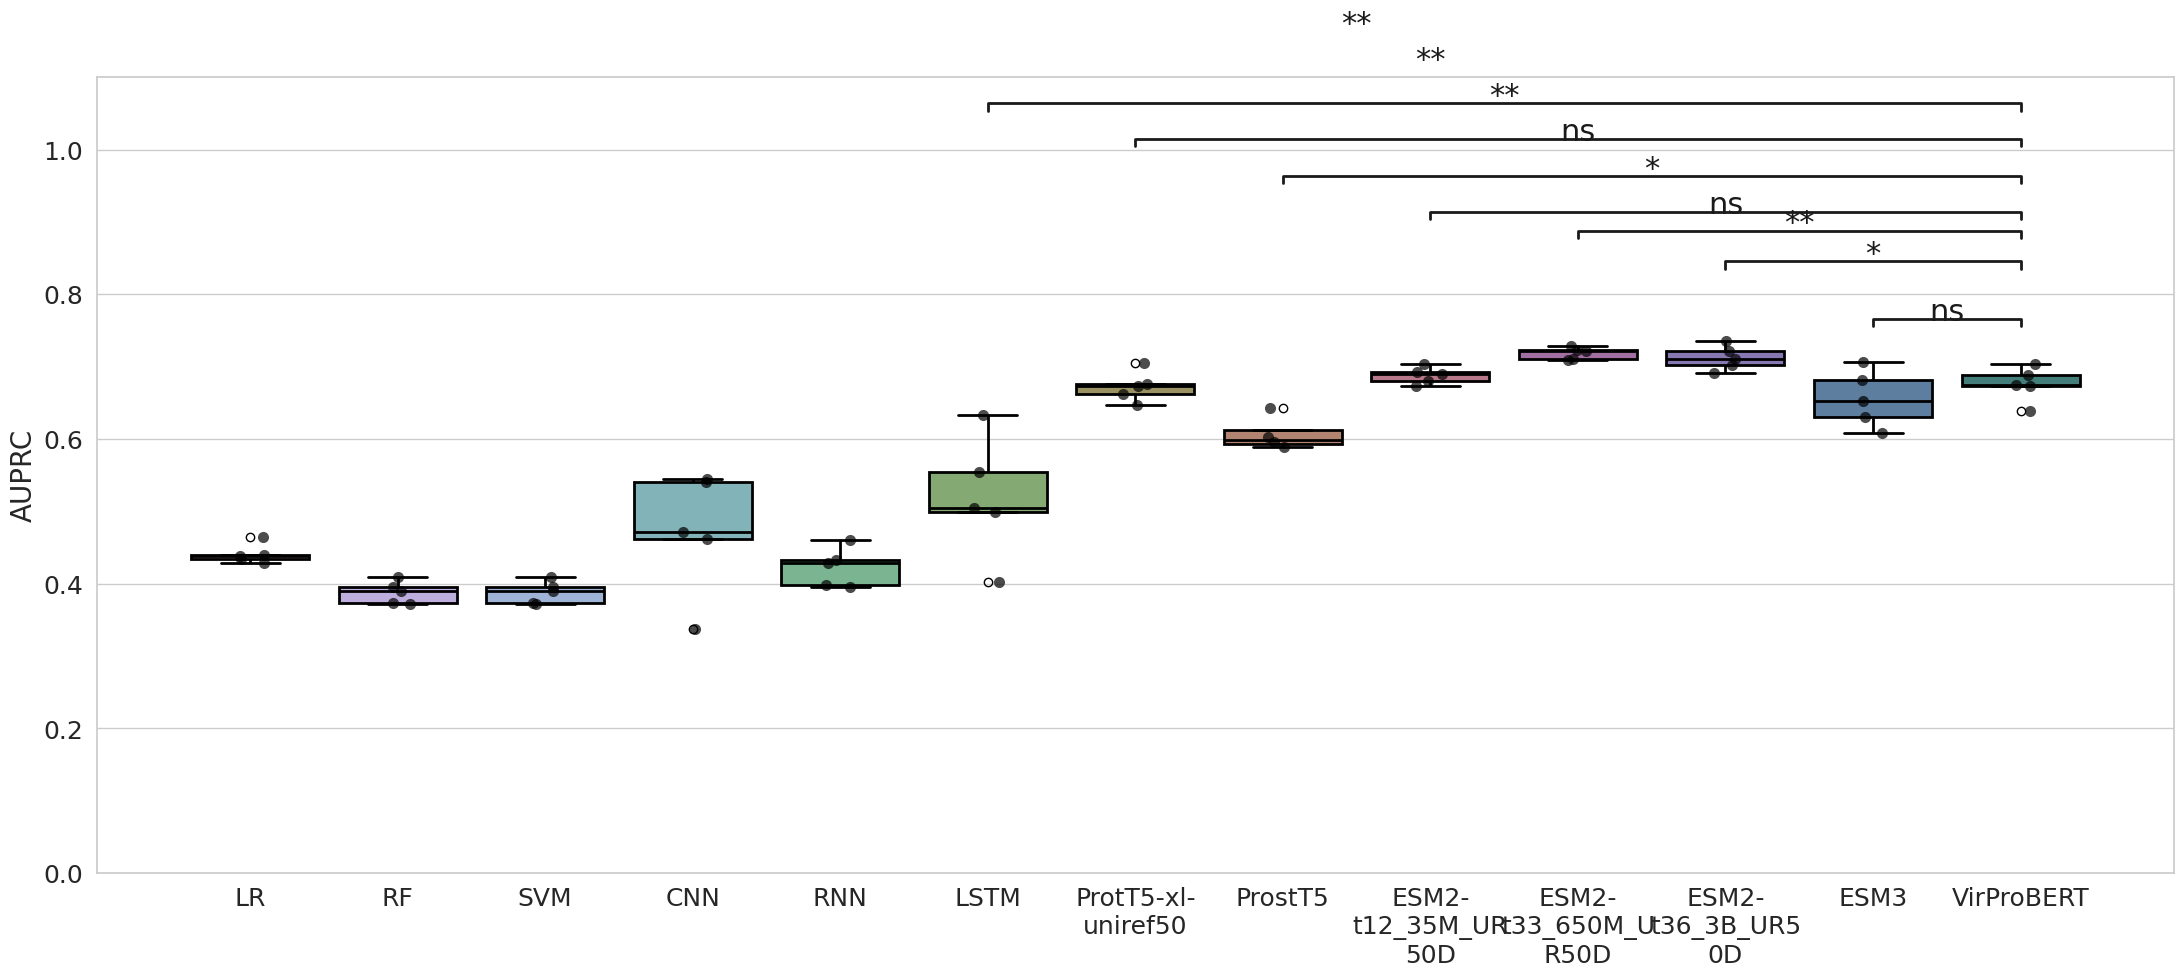

In [12]:
plot_boxplot_w_stat_custom_annotation(sub_df, "auprc", pairs, location="inside", ylim=(0, 1.1))

In [13]:
df

,itr,experiment,auprc
0,0,LR,0.433765
1,1,LR,0.428972
2,2,LR,0.440230
3,3,LR,0.464170
4,4,LR,0.437962
...,...,...,...
74,0,VirProBERT,0.639349
75,1,VirProBERT,0.672554
76,2,VirProBERT,0.703604
77,3,VirProBERT,0.688975


In [18]:
df[["experiment", "auprc"]].groupby("experiment").agg(["mean", "std"])

auprc          
                         mean       std
experiment                             
CNN                  0.471601  0.083857
ESM2-t12_35M_UR50D   0.687613  0.011723
ESM2-t33_650M_UR50D  0.718822  0.008105
ESM2-t36_3B_UR50D    0.712150  0.017103
ESM3                 0.655855  0.039196
FNN                  0.569747  0.045961
LR                   0.441020  0.013635
LSTM                 0.518839  0.084445
ProstT5              0.607420  0.024561
ProstT5-lr3e-4-old   0.596748  0.020187
ProtT5-xl-uniref50   0.672491  0.021348
RF                   0.388085  0.015864
RNN                  0.423322  0.027061
SVM                  0.388085  0.015864
Transformer-Encoder  0.559360  0.021680
VirProBERT           0.675713  0.023920